In [ ]:

import pandas as pd
import requests
from textblob import TextBlob
import tweepy
print(pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import json


The below code is used for authorizing me, the user with the twitter api

In [36]:
bearer_token = ''

headers = {
    'Authorization': f'Bearer {bearer_token}',
}


The below code used TextBlob to analyze the sentiment of the tweets. It categorizes the tweets into postive, neutral and negative


In [13]:
def get_sentiment(tweets):
    sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
    neutralSet = []
    for tweet in tweets:
        print("this is the tweet: " + str(tweet))
        analysis = TextBlob(tweet)
        # Determine sentiment
        if analysis.sentiment.polarity > 0:
            sentiments['positive'] += 1
        elif analysis.sentiment.polarity == 0:
            sentiments['neutral'] += 1
            neutralSet.append(tweet)
        else:
            sentiments['negative'] += 1
    
    return (sentiments, neutralSet)

I stored the tweets into .txt files so I can save them. Below, I read from the .txt to get the tweets for trump and harris

In [130]:
def writeToFile(path, tweets):
    with open (path, "w", encoding = 'utf-8') as file:
        for tweet in tweets:
            file.write(str(tweet))
            file.write("\n")
file.close()

In [19]:
def readFile(path):
    tweets = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:  # Check if line is not empty
                try:
                # Find the start and end indices of the 'text' value
                    start_index = line.index("'text':") + len("'text':")
                    end_index = line.index("}")  # Find the closing quote of the 'text' value

                # Extract the tweet message
                    tweet_message = line[start_index:end_index].strip().strip('\'"')
                    print(tweet_message)
                    tweets.append(tweet_message)
                except ValueError as e:
                    print(f"Error extracting tweet message on line: {line}")
                    print(f"Error message: {e}")

    return tweets 

The below code was for fetching the tweets

In [70]:
import requests

# Define your bearer token for authentication


def create_url(query, max_results=100):
    search_url = "https://api.twitter.com/2/tweets/search/recent"
    query_params = {
        'query': query,
        'max_results': max_results,
        'tweet.fields': 'text,id',  # Include 'id' field to track duplicates
    }
    return search_url, query_params

def connect_to_endpoint(url, headers, params):
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        raise Exception(f"Request returned an error: {response.status_code} {response.text}")
    return response.json()

def fetch_tweets(query, max_tweets=1000):
    headers = {"Authorization": f"Bearer {bearer_token}"}
    all_tweets = []
    tweet_ids = set()
    next_token = None

    while len(all_tweets) < max_tweets:
        url, params = create_url(query)
        if next_token:
            params['next_token'] = next_token
        
        json_response = connect_to_endpoint(url, headers, params)
        tweets = json_response.get('data', [])
        
        for tweet in tweets:
            if tweet['id'] not in tweet_ids:
                tweet_ids.add(tweet['id'])
                all_tweets.append(tweet)
        
        # Check if there's a next_token to continue pagination
        if 'meta' in json_response and 'next_token' in json_response['meta']:
            next_token = json_response['meta']['next_token']
        else:
            break  # No more tweets available

        if len(all_tweets) >= max_tweets:
            break

    return all_tweets[:max_tweets]  # Return only the max_tweets requested

def print_tweets(tweets, label):
    print(f"\nTweets about {label}:")
    for tweet in tweets:
        print(tweet['text'])

# Example usage



This code was for plotting the sentiment for Trump and Harris, respectively.

In [29]:
def plot_sentiment_comparison(harris_sentiments, trump_sentiments):
    categories = ['positive', 'neutral', 'negative']
    harris_values = [harris_sentiments[category] for category in categories]
    trump_values = [trump_sentiments[category] for category in categories]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    bar1 = ax.bar(index, harris_values, bar_width, label='Kamala Harris')
    bar2 = ax.bar(index + bar_width, trump_values, bar_width, label='Donald Trump')

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Number of Tweets')
    ax.set_title('Sentiment Comparison between Kamala Harris and Donald Trump')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

In [ ]:
trump_tweets2000 = readFile("trumpTweets2000.txt")
harris_tweets2000 = readFile("HarrisTweets2000.txt")


In [ ]:
(TrumpSentiment, neutralTweetsTrump) = get_sentiment(trump_tweets2000)
(HarrisSentiment, neutralTweetsHarris) = get_sentiment(harris_tweets2000)

In [33]:
TrumpSentiment

{'positive': 537, 'neutral': 594, 'negative': 869}

In [34]:
HarrisSentiment

{'positive': 471, 'neutral': 482, 'negative': 1047}

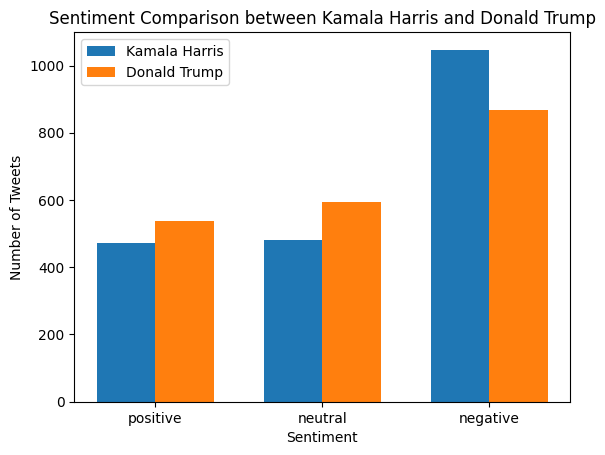

In [35]:
plot_sentiment_comparison(HarrisSentiment, TrumpSentiment)

Overall, I've found that Trump has a slightly more postive sentiment than harris. This may be because I only used a sample size of 2000 tweets, and those tweets may have had more of a bias for Trump.